In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma, lognorm

covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
covid_cases_df=pd.DataFrame(covid_cases_data)
newjersey_data=covid_cases_df[covid_cases_df['State']=='NJ']
print("Number of rows:", newjersey_data.shape[0])
print("Number of columns:", newjersey_data.shape[1])

newjersey_data.head(22)
#print(newjersey_data.columns)

Number of rows: 22
Number of columns: 1269


,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
1804,0,Statewide Unallocated,NJ,34,0,0,0,0,0,0,...,1608,1608,1608,1608,1608,1608,1608,1608,1608,1608
1805,34001,Atlantic County,NJ,34,0,0,0,0,0,0,...,89852,89852,89852,89852,89852,89852,89852,89852,89852,89852
1806,34003,Bergen County,NJ,34,0,0,0,0,0,0,...,320734,320734,320734,320734,320734,320734,320734,320734,320734,320734
1807,34005,Burlington County,NJ,34,0,0,0,0,0,0,...,138798,138798,138798,138798,138798,138798,138798,138798,138798,138798
1808,34007,Camden County,NJ,34,0,0,0,0,0,0,...,166044,166044,166044,166044,166044,166044,166044,166044,166044,166044
1809,34009,Cape May County,NJ,34,0,0,0,0,0,0,...,29823,29823,29823,29823,29823,29823,29823,29823,29823,29823
1810,34011,Cumberland County,NJ,34,0,0,0,0,0,0,...,51414,51414,51414,51414,51414,51414,51414,51414,51414,51414
1811,34013,Essex County,NJ,34,0,0,0,0,0,0,...,287354,287354,287354,287354,287354,287354,287354,287354,287354,287354
1812,34015,Gloucester County,NJ,34,0,0,0,0,0,0,...,89819,89819,89819,89819,89819,89819,89819,89819,89819,89819
1813,34017,Hudson County,NJ,34,0,0,0,0,0,0,...,234993,234993,234993,234993,234993,234993,234993,234993,234993,234993


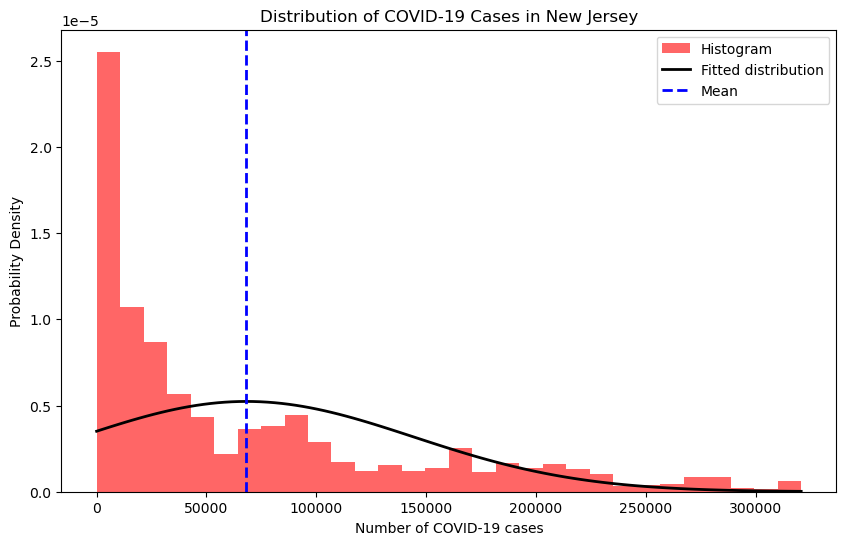

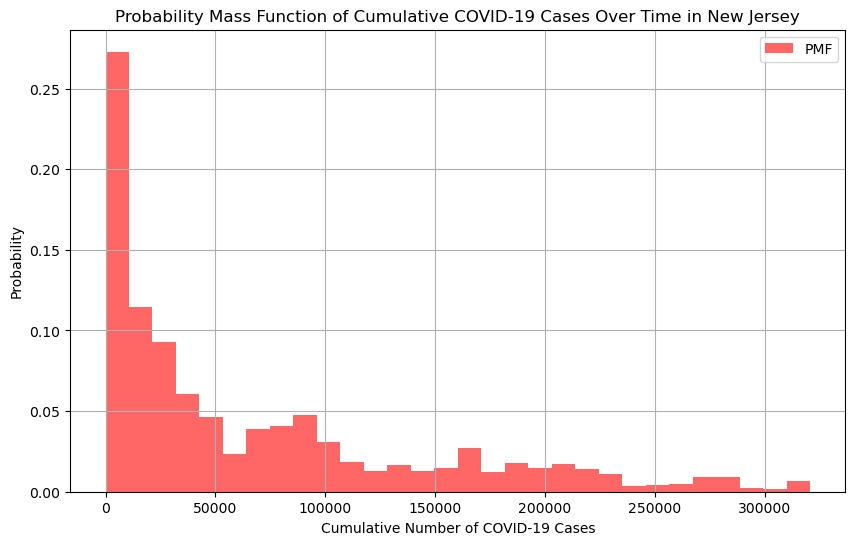

Mean: 68179.8922745239
Variance: 5802582068.19134
Skewness: 1.3004041950738874
Kurtosis: 0.8507413577975398


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

# Load COVID-19 cases data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")
covid_cases_df = pd.DataFrame(covid_cases_data)

# Filter data for New Jersey
newjersey_data = covid_cases_df[covid_cases_df['State'] == 'NJ']

# Extract COVID-19 cases data
cases = newjersey_data.iloc[:, 4:].values.flatten()

# Fit a distribution to the COVID-19 cases data
fit_params = norm.fit(cases)  # Example: Fit a normal distribution

# Generate data points for the fitted distribution
x = np.linspace(min(cases), max(cases), 100)
pdf_fitted = norm.pdf(x, *fit_params)

# Plot histogram of the COVID-19 cases data
plt.figure(figsize=(10, 6))
plt.hist(cases, bins=30, density=True, alpha=0.6, color='r', label='Histogram')

# Plot the fitted distribution
plt.plot(x, pdf_fitted, 'k-', lw=2, label='Fitted distribution')

# Add a vertical line at the mean of the fitted distribution
mean_value = fit_params[0]
plt.axvline(mean_value, color='b', linestyle='--', linewidth=2, label='Mean')

# Add labels and legend
plt.xlabel('Number of COVID-19 cases')
plt.ylabel('Probability Density')
plt.title('Distribution of COVID-19 Cases in New Jersey')
plt.legend()

# Show plot
plt.show()

# Calculate distribution statistics
variance = fit_params[1]**2
skewness = skew(cases)
kurtosis_value = kurtosis(cases)

# Calculate PMF if the data is discrete
if len(set(cases)) < len(cases):
    hist, bins = np.histogram(cases, bins=30, density=False)
    bin_centers = (bins[1:] + bins[:-1]) / 2
    pmf = hist / np.sum(hist)
    
    # Plot the PMF
    plt.figure(figsize=(10, 6))
    plt.bar(bin_centers, pmf, width=np.diff(bins), color='r', alpha=0.6, label='PMF')
    plt.xlabel('Cumulative Number of COVID-19 Cases')
    plt.ylabel('Probability')
    plt.title('Probability Mass Function of Cumulative COVID-19 Cases Over Time in New Jersey')
    plt.legend()
    plt.grid(True)
    
    plt.show()
    
    print("Mean:", mean_value)
    print("Variance:", variance)
    print("Skewness:", skewness)
    print("Kurtosis:", kurtosis_value)

Statistics for NY:
Mean: 52316.36694899303
Variance: 16614917155.712536
Skewness: 4.055979055579067
Kurtosis: 18.03388071309114


Statistics for CA:
Mean: 96084.468587124
Variance: 97393286286.88629
Skewness: 7.768969821058437
Kurtosis: 72.11839293327415


Statistics for TX:
Mean: 17177.3597085949
Variance: 5626004477.294088
Skewness: 9.894635293298025
Kurtosis: 124.2173786818857


Statistics for FL:
Mean: 56864.541560102305
Variance: 21539543606.641594
Skewness: 6.133121388833411
Kurtosis: 48.25202288865914


Statistics for IL:
Mean: 19484.72546912775
Variance: 6266489977.034943
Skewness: 9.61014227035817
Kurtosis: 110.87845603722461




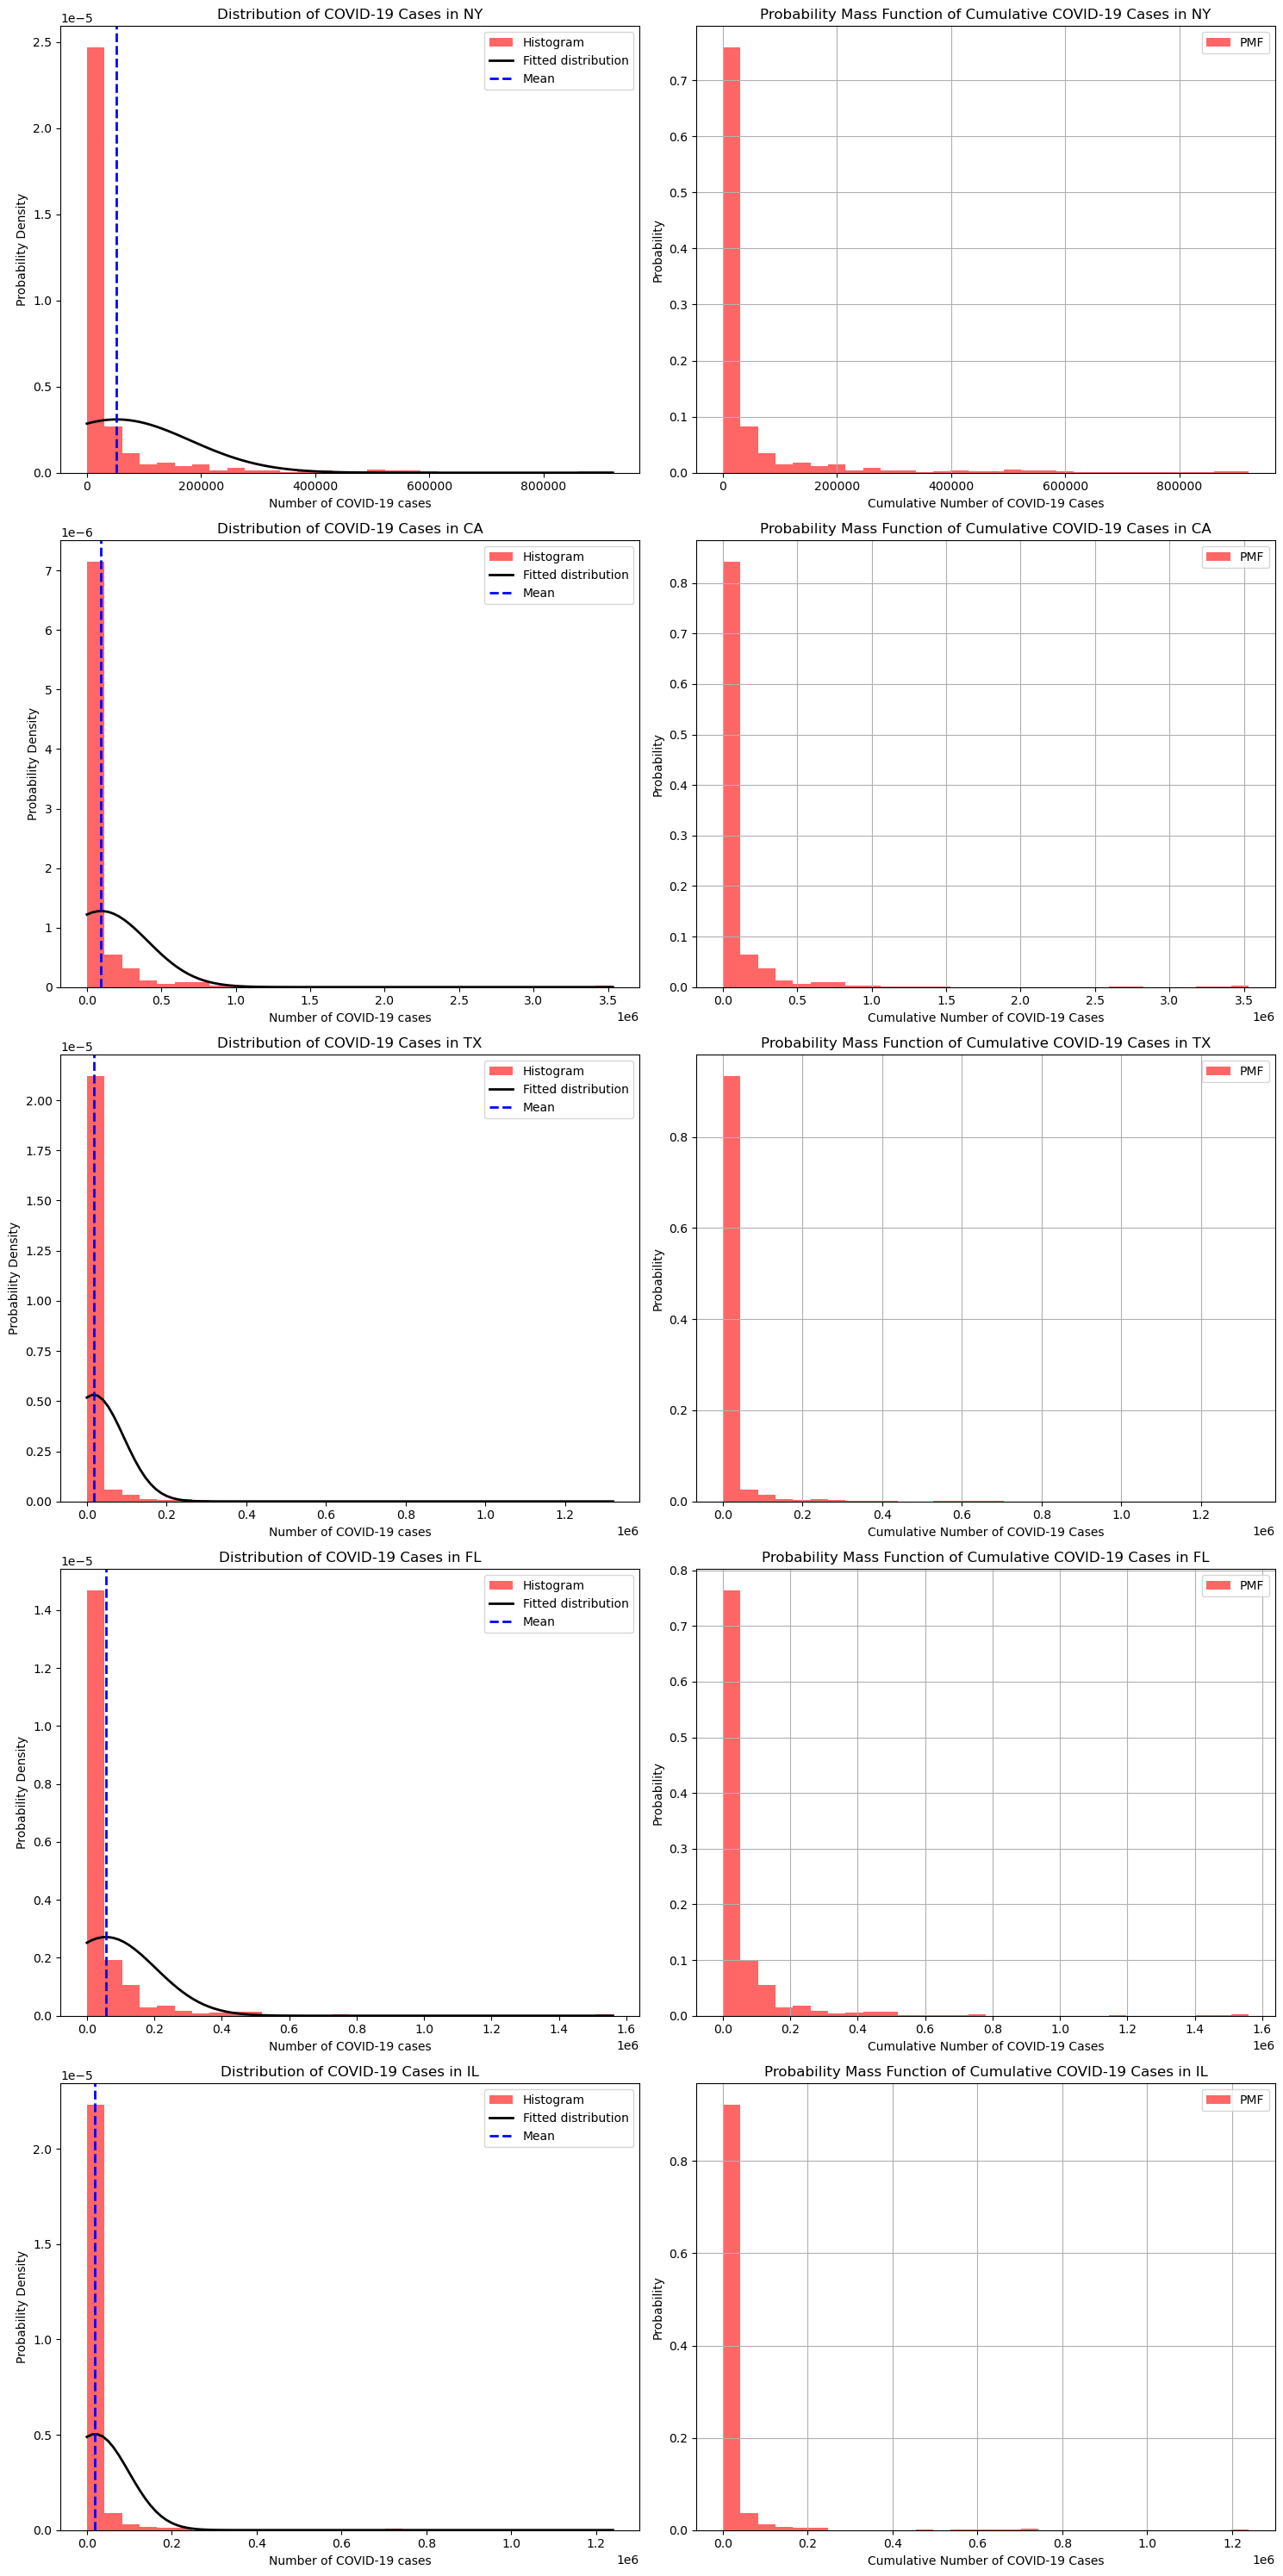

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

# Load COVID-19 cases data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")
covid_cases_df = pd.DataFrame(covid_cases_data)

# Define states for comparison
states_to_compare = ['NY', 'CA', 'TX', 'FL', 'IL']

# Create subplots for comparison
fig, axs = plt.subplots(len(states_to_compare), 2, figsize=(15, 6*len(states_to_compare)))

for i, state in enumerate(states_to_compare):
    # Filter data for the state
    state_data = covid_cases_df[covid_cases_df['State'] == state]
    
    # Extract COVID-19 cases data
    cases = state_data.iloc[:, 4:].values.flatten()
    
    # Fit a distribution to the COVID-19 cases data
    fit_params = norm.fit(cases)
    
    # Generate data points for the fitted distribution
    x = np.linspace(min(cases), max(cases), 100)
    pdf_fitted = norm.pdf(x, *fit_params)
    
    # Plot histogram of the COVID-19 cases data
    axs[i, 0].hist(cases, bins=30, density=True, alpha=0.6, color='r', label='Histogram')
    
    # Plot the fitted distribution
    axs[i, 0].plot(x, pdf_fitted, 'k-', lw=2, label='Fitted distribution')
    
    # Add a vertical line at the mean of the fitted distribution
    mean_value = fit_params[0]
    axs[i, 0].axvline(mean_value, color='b', linestyle='--', linewidth=2, label='Mean')
    
    # Add labels and legend
    axs[i, 0].set_xlabel('Number of COVID-19 cases')
    axs[i, 0].set_ylabel('Probability Density')
    axs[i, 0].set_title(f'Distribution of COVID-19 Cases in {state}')
    axs[i, 0].legend()
    
    # Calculate distribution statistics
    variance = fit_params[1]**2
    skewness = skew(cases)
    kurtosis_value = kurtosis(cases)
    
    # Plot PMF if the data is discrete
    if len(set(cases)) < len(cases):
        hist, bins = np.histogram(cases, bins=30, density=False)
        bin_centers = (bins[1:] + bins[:-1]) / 2
        pmf = hist / np.sum(hist)
        
        # Plot the PMF
        axs[i, 1].bar(bin_centers, pmf, width=np.diff(bins), color='r', alpha=0.6, label='PMF')
        axs[i, 1].set_xlabel('Cumulative Number of COVID-19 Cases')
        axs[i, 1].set_ylabel('Probability')
        axs[i, 1].set_title(f'Probability Mass Function of Cumulative COVID-19 Cases in {state}')
        axs[i, 1].legend()
        axs[i, 1].grid(True)
    
    # Print statistics
    print(f"Statistics for {state}:")
    print("Mean:", mean_value)
    print("Variance:", variance)
    print("Skewness:", skewness)
    print("Kurtosis:", kurtosis_value)
    print("\n")

# Adjust layout
plt.tight_layout()
plt.show()


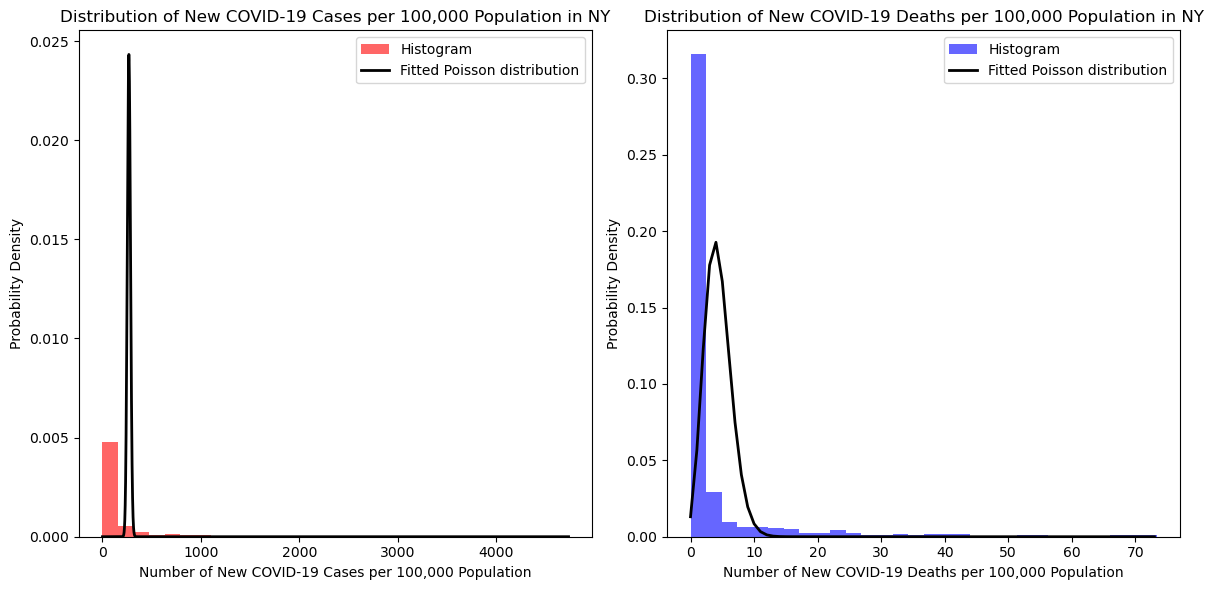

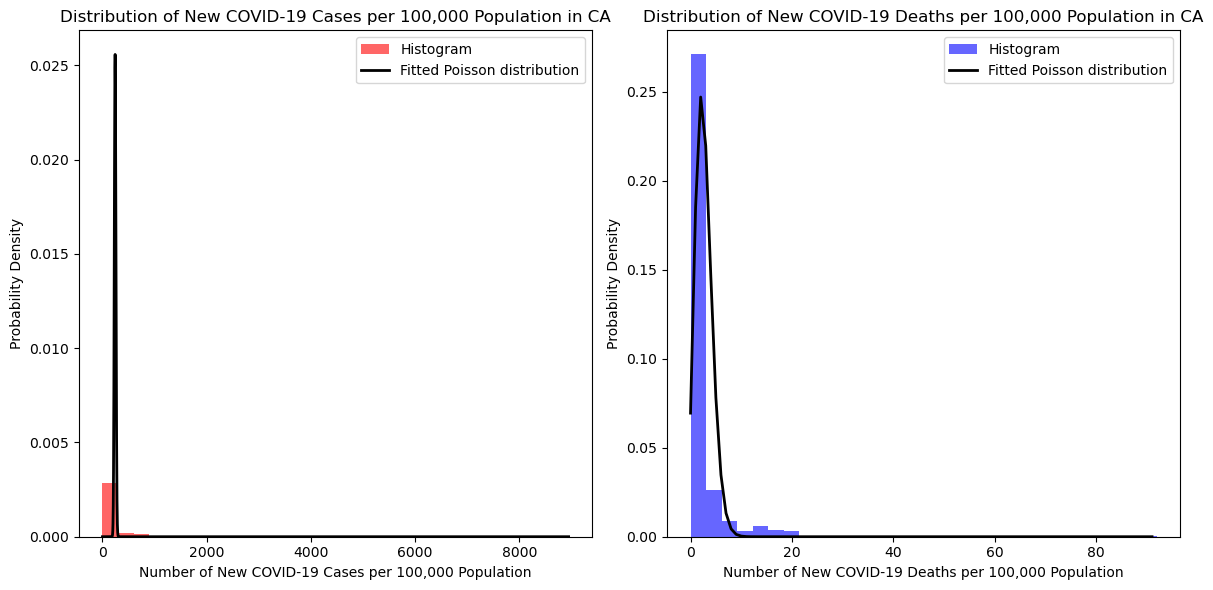

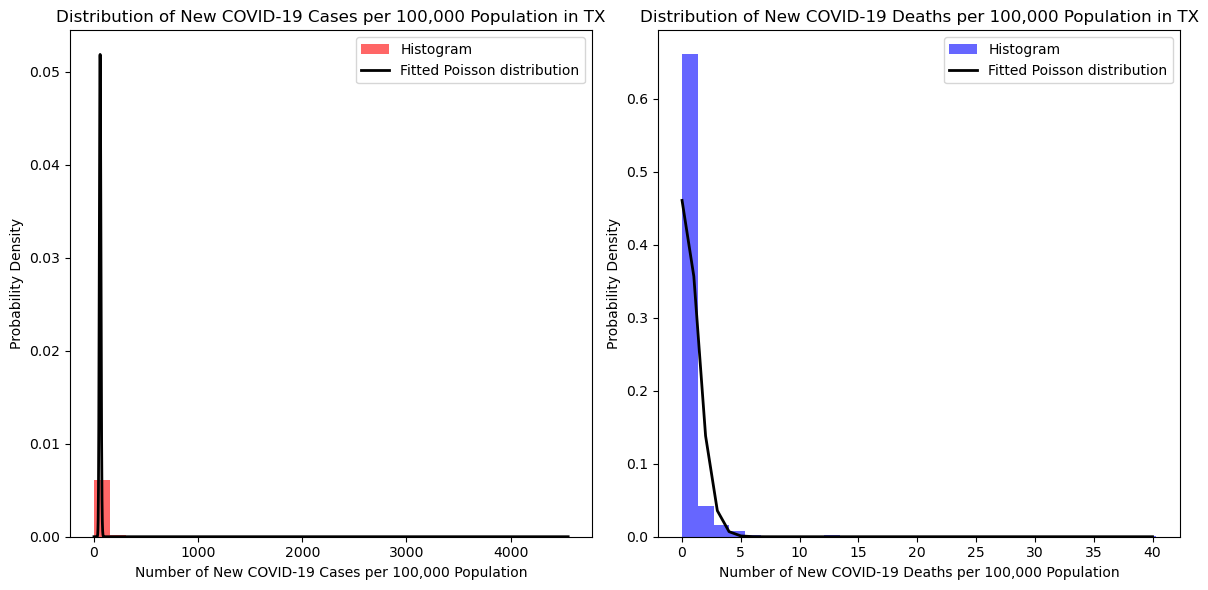

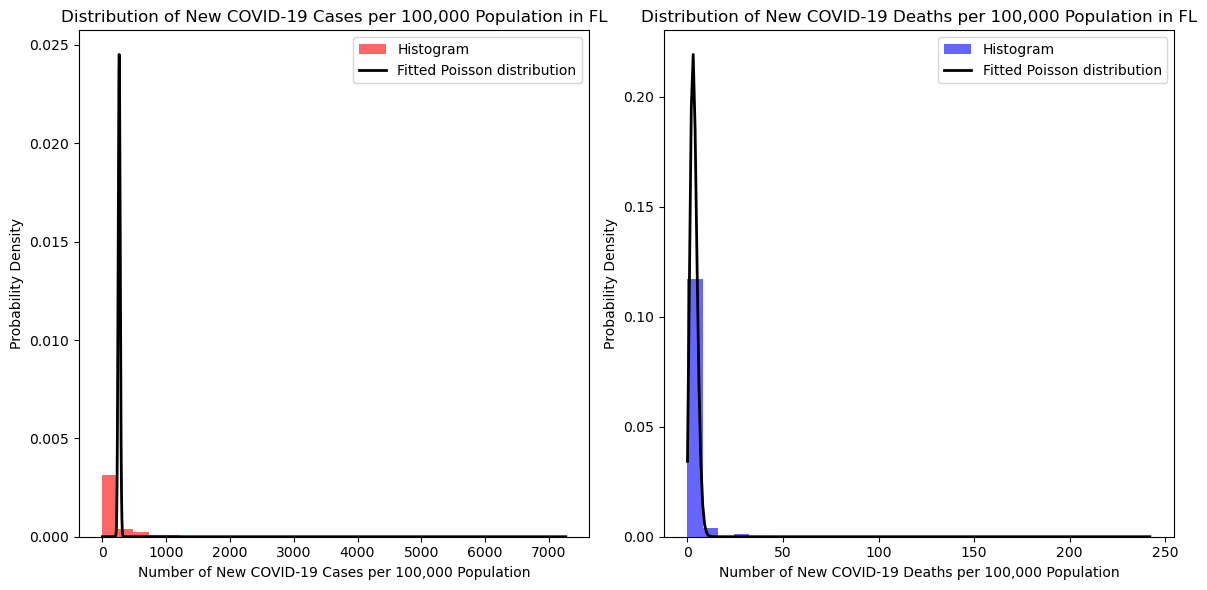

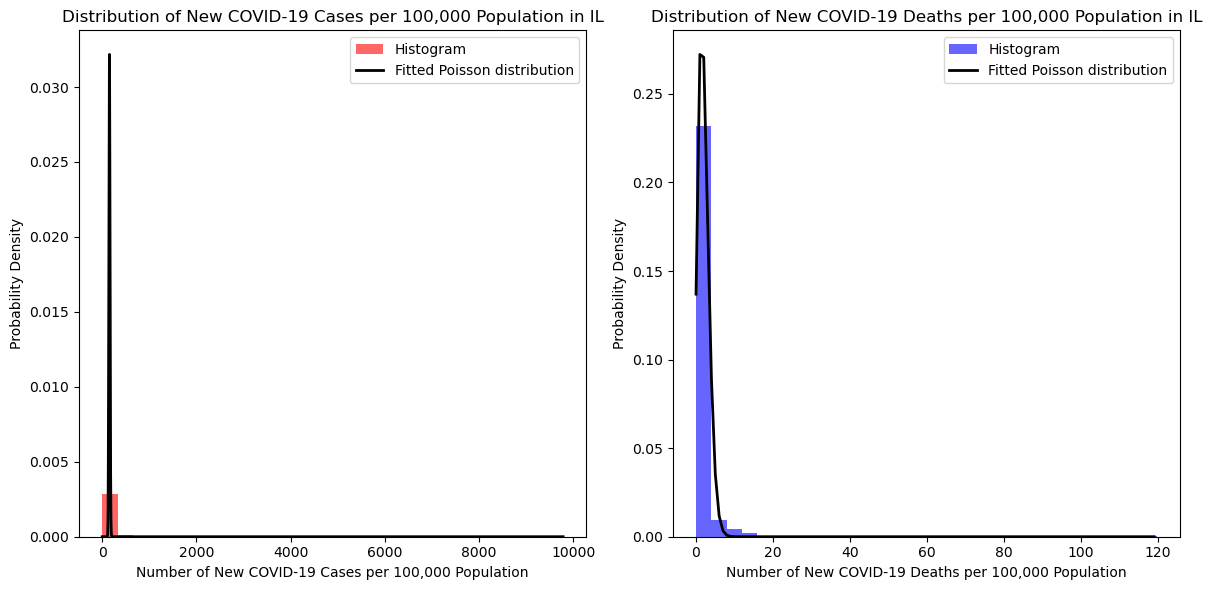

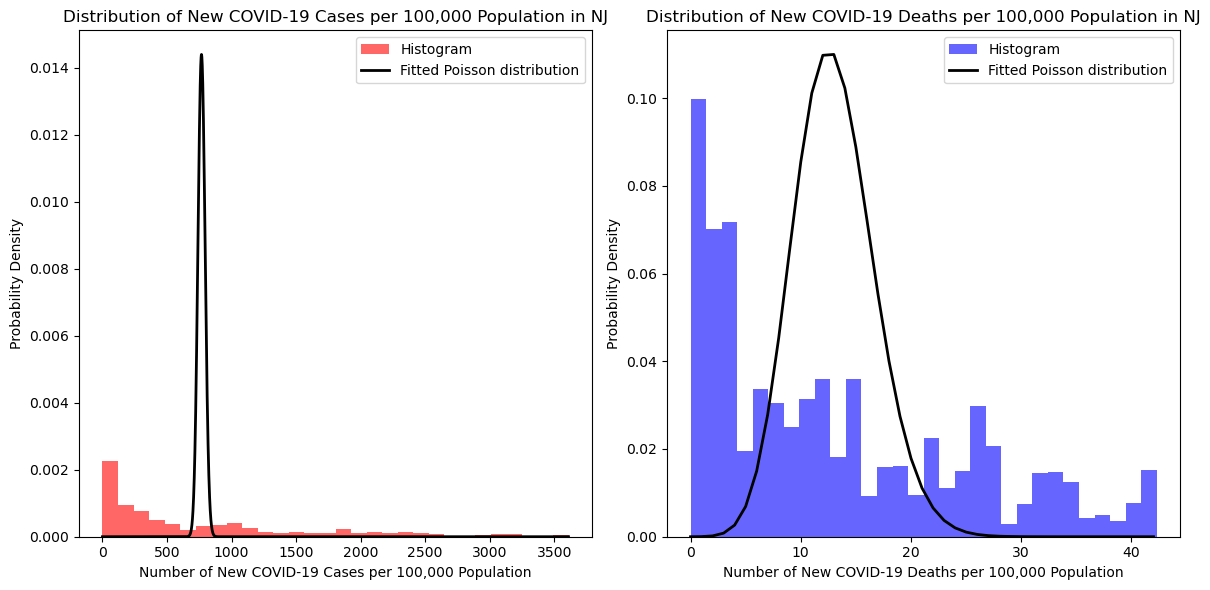

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Load COVID-19 cases and deaths data for multiple states
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")
covid_population_data = pd.read_csv("covid_county_population_usafacts.csv")

# Define a list of states to analyze
states = ['NY', 'CA', 'TX', 'FL', 'IL', 'NJ']

# Loop through each state
for state in states:
    # Filter data for the current state
    state_cases_data = covid_cases_data[covid_cases_data['State'] == state]
    state_deaths_data = covid_deaths_data[covid_deaths_data['State'] == state]
    state_population_data = covid_population_data[covid_population_data['State'] == state]
    
    # Calculate population of the current state
    population_of_state = state_population_data['population'].sum()

    # Adjust cases and deaths to new cases and deaths per 100,000 population
    state_cases = state_cases_data.iloc[:, 4:].values.flatten()
    state_deaths = state_deaths_data.iloc[:, 4:].values.flatten()
    state_cases_per_100k = state_cases / (population_of_state / 100000)
    state_deaths_per_100k = state_deaths / (population_of_state / 100000)
    
    # Fit Poisson distributions to the adjusted COVID-19 cases and deaths data
    mean_lambda_cases = np.mean(state_cases_per_100k)
    mean_lambda_deaths = np.mean(state_deaths_per_100k)
    
    # Generate data points for the fitted Poisson distributions
    x_poisson_cases = np.arange(int(np.min(state_cases_per_100k)), int(np.max(state_cases_per_100k)) + 1)
    x_poisson_deaths = np.arange(int(np.min(state_deaths_per_100k)), int(np.max(state_deaths_per_100k)) + 1)
    pmf_poisson_cases = poisson.pmf(x_poisson_cases, mu=mean_lambda_cases)
    pmf_poisson_deaths = poisson.pmf(x_poisson_deaths, mu=mean_lambda_deaths)
    
    # Plot histograms of the adjusted COVID-19 cases and deaths data along with the fitted Poisson distributions
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(state_cases_per_100k, bins=30, density=True, alpha=0.6, color='r', label='Histogram')
    plt.plot(x_poisson_cases, pmf_poisson_cases, 'k-', lw=2, label='Fitted Poisson distribution')
    plt.xlabel('Number of New COVID-19 Cases per 100,000 Population')
    plt.ylabel('Probability Density')
    plt.title(f'Distribution of New COVID-19 Cases per 100,000 Population in {state}')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.hist(state_deaths_per_100k, bins=30, density=True, alpha=0.6, color='b', label='Histogram')
    plt.plot(x_poisson_deaths, pmf_poisson_deaths, 'k-', lw=2, label='Fitted Poisson distribution')
    plt.xlabel('Number of New COVID-19 Deaths per 100,000 Population')
    plt.ylabel('Probability Density')
    plt.title(f'Distribution of New COVID-19 Deaths per 100,000 Population in {state}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()